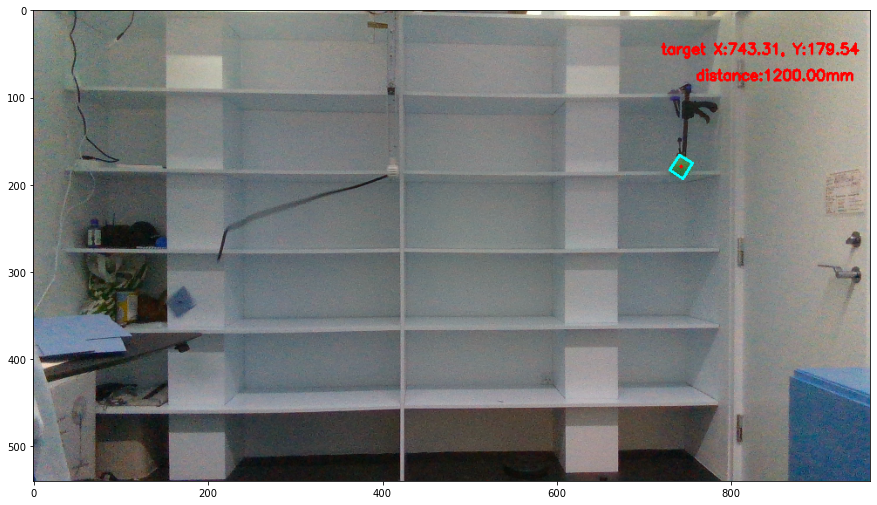

In [25]:
#green ball detection
import pyrealsense2 as rs
import numpy as np
import cv2
from imutils import perspective
from scipy.spatial import distance as dist
import matplotlib.pyplot as plt

def midpoint(box):
    x=(min(box[:,0][:])+max(box[:,0][:]))/2
    y=(min(box[:,1][:])+max(box[:,1][:]))/2
    
    return [x,y]

D=1200
img=cv2.imread('green_ball.png')
gs_frame=cv2.GaussianBlur(img,(5,5),0)
hsv=cv2.cvtColor(gs_frame,cv2.COLOR_BGR2HSV)
erode_hsv=cv2.erode(hsv, None, iterations=2)

color=(255,0,0)
low=(45,70,65)
high=(72,231,255)
mask=cv2.inRange(erode_hsv,low,high)

cnts,_=cv2.findContours(mask.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
c = max(cnts, key=cv2.contourArea)
rect = cv2.minAreaRect(c)
box = cv2.boxPoints(rect)
center=midpoint(box)
cv2.putText(img, "target X:{:.2f}, Y:{:.2f} ".format(center[0],center[1]), (720,50), 
                        cv2.FONT_HERSHEY_SIMPLEX, 
                        0.55, color, 2)
cv2.putText(img,"distance:{:.2f}mm".format(D),(760,80),cv2.FONT_HERSHEY_SIMPLEX, 
                        0.55, color, 2)
cv2.drawContours(img, [np.int0(box)], -1, (0, 255, 255), 2)
cv2.circle(img, (int(center[0]),int(center[1])), 2, color, -1)
plt.figure(figsize=(15,12))
plt.imshow(img)


0.0
[[[679 247]]]
1.5
[[[728  99]]

 [[727 100]]

 [[728 100]]

 [[729 101]]

 [[729 100]]]
0.0
[[[396  34]]]


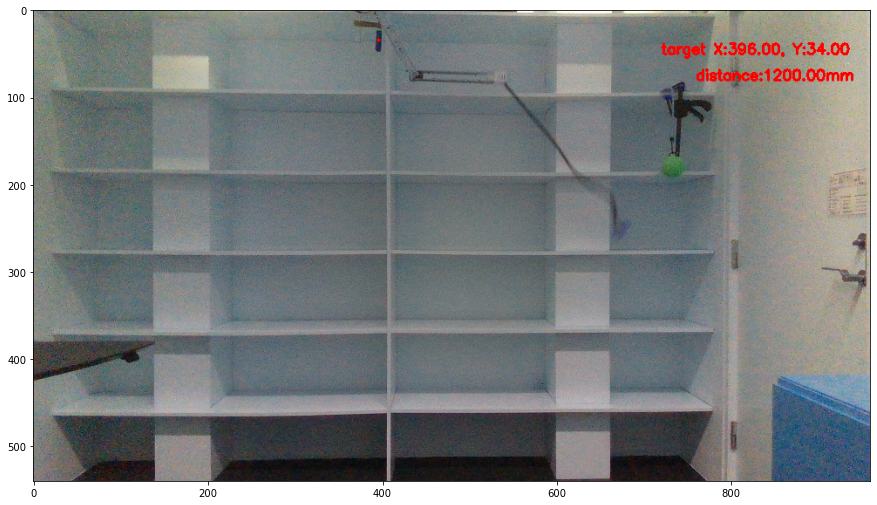

In [59]:
# try red track 
import pyrealsense2 as rs
import numpy as np
import cv2
from imutils import perspective
from scipy.spatial import distance as dist
import matplotlib.pyplot as plt

def midpoint(box):
    x=(min(box[:,0][:])+max(box[:,0][:]))/2
    y=(min(box[:,1][:])+max(box[:,1][:]))/2
    
    return [x,y]

D=1200
img=cv2.imread('red2.png')
gs_frame=cv2.GaussianBlur(img,(11,11),0)
hsv=cv2.cvtColor(gs_frame,cv2.COLOR_BGR2HSV)
erode_hsv=cv2.erode(hsv, None, iterations=2)

color=(255,0,0)
low=(0,79,41)
high=(10,120,119)
mask=cv2.inRange(erode_hsv,low,high)

cnts,_=cv2.findContours(mask.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(cnts)):
    find_cnt=cnts[i].flatten()
    if find_cnt[1]>420:
        continue
    else:
        c=cnts[i]
        print(cv2.contourArea(cnts[i]))
        
        print(c)


# c = max(cnts, key=cv2.contourArea)
rect = cv2.minAreaRect(c)
box = cv2.boxPoints(rect)
center=midpoint(box)
cv2.putText(img, "target X:{:.2f}, Y:{:.2f} ".format(center[0],center[1]), (720,50), 
                        cv2.FONT_HERSHEY_SIMPLEX, 
                        0.55, color, 2)
cv2.putText(img,"distance:{:.2f}mm".format(D),(760,80),cv2.FONT_HERSHEY_SIMPLEX, 
                        0.55, color, 2)
cv2.drawContours(img, [np.int0(box)], -1, (0, 255, 255), 2)
cv2.circle(img, (int(center[0]),int(center[1])), 2, color, -1)
plt.figure(figsize=(15,12))
plt.imshow(img)
